
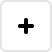
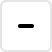
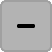
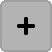
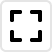
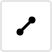
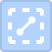
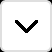
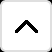
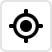
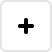
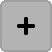
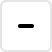
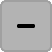
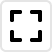
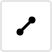
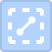
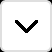
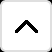
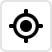

In [1]:
import numpy as np

from lets_plot.mapping import as_discrete
from lets_plot import *

LetsPlot.setup_html()

In [2]:
np.random.seed(1)

n = 6
x = list(range(n))
y1 = np.random.rand(n)
y2 = np.random.rand(n)

### Short form

In [3]:
ggplot() + \
    geom_point(aes('x', 'y'), data={'x': x, 'y': y1}, color='red', shape=21, show_key="Red zone") + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2}, color='blue', linetype=2, show_key="Blue zone") + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, fill='green', alpha=0.2, show_key="Green zone") + \
    geom_label(label="Text", x=6, y=0.2, fill='orange', color='white', size=8, show_key="Orange zone")

### Parameterized form

`layer_key(label, group=None, index=None, **kwargs)`:

    - label - text in legend
    - group - the key by which items are combined into a legend group
    - index - to order items in legend group
    - **kwargs - aes values to override in the legend
    

In [4]:
p1 = ggplot() + \
    geom_point(aes('x', 'y'), data={'x': x, 'y': y1}, color='red', shape=21, 
               show_key=layer_key("Red zone")) + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2}, color='blue', linetype=2, 
              show_key=layer_key("Blue zone")) + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, fill='green', alpha=0.2,
              show_key=layer_key("Green zone", alpha=1)) + \
    geom_label(label="Text", x=6, y=0.2, fill='orange', color='white', size=8, 
               show_key=layer_key("Orange zone", color='black'))
p1

Reorder using `index`:

In [5]:
ggplot() + \
    geom_point(aes('x', 'y'), data={'x': x, 'y': y1}, color='red', shape=21, 
               show_key=layer_key("Red zone", index=0)) + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2}, color='blue', linetype=2, 
              show_key=layer_key("Blue zone", index=2)) + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, fill='green', alpha=0.2,
              show_key=layer_key("Green zone", alpha=1, index=1)) + \
    geom_label(label="Text", x=6, y=0.2, fill='orange', color='white', size=8, 
               show_key=layer_key("Orange zone", color='black', index=3))

Use `group` to put items to different legend groups:

In [6]:
p2 = ggplot() + \
    geom_point(aes('x', 'y'), data={'x': x, 'y': y1}, color='red', shape=21, 
               show_key=layer_key(label="Red zone", group="Group1")) + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2}, color='blue', linetype=2, 
              show_key=layer_key(label="Blue zone", group="Group1")) + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, fill='green', alpha=0.2,
              show_key=layer_key(label="Green zone", alpha=1, group="Group2")) + \
    geom_label(label="Text", x=6, y=0.2, fill='orange', color='white', size=8, 
               show_key=layer_key(label="Orange zone", color='black', group="Group3"))
p2

#### Append items to existing 'color' legend

In [7]:
ggplot() + \
    geom_point(aes('x', 'y', color=as_discrete('x')), data={'x': x, 'y': y1},
               show_key=layer_key("point", group='color', shape=21)) + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2},               
              linetype=4, color='blue', 
              show_key=layer_key("line", group='color'))

### Guide options

New parameter `title` in `guide_legend()/guide_colorbar()`.

In [8]:
# To custom legend

p1 + guides(custom_legend=guide_legend(title="Color zones", nrow=2)) 

In [9]:
# To named legend groups

p2 + guides(Group1=guide_legend(title="Zone 1", ncol=2), 
            Group2=guide_legend(title="Zone 2"), 
            Group3=guide_legend(title="Zone 3"))

Check `title` in `guide_colorbar()`

Example from https://github.com/JetBrains/lets-plot/issues/760

In [10]:
data = {
    'x': [0, 1, 1, 1],
    'y': [0, 1, 2, 2],
}
p3 = ggplot(data, aes("x", "y")) + \
    geom_bin2d() + \
    ggmarginal("t", layer=geom_point(aes(color='..count..'), stat='count', size=10)) + \
    ggmarginal("r", layer=geom_point(aes(color='..count..'), stat='count', size=10, orientation='y')) 

gggrid([
    p3,
    p3 + guides(color=guide_colorbar(title="Color"), fill=guide_colorbar(title="Fill"))
])
    

### Change title using `labs()`

Use the `custom_legend` parameter to specify a title for the custom legend. It can be a string or a dictionary legend_group=title.

It generates `'guides'`-spec.

In [11]:
p1_with_labs = p1 + labs(custom_legend="Zones")

print(p1_with_labs.as_dict()['guides'])
p1_with_labs

{'custom_legend': {'name': 'legend', 'title': 'Zones'}}


But not combine 'guides' - the last one will be taken...

In [12]:
p1_with_labs = p1 + labs(custom_legend="Zones") + guides(custom_legend=guide_legend(ncol=2))

print(p1_with_labs.as_dict()['guides'])
p1_with_labs

{'custom_legend': {'name': 'legend', 'ncol': 2}}


Use dict as value for parameter:

In [13]:
p2_with_labs = p2 + labs(custom_legend=dict(Group1="Zone 1", Group2=""))

print(p2_with_labs.as_dict()['guides'])
p2_with_labs

{'Group1': {'name': 'legend', 'title': 'Zone 1'}, 'Group2': {'name': 'legend', 'title': ''}}


### Ways to set a title

Using:
- `guides()`
- `labs()`
- `scale(name)`
- `scale(guide=guide_xxx(title))`

In [14]:
def plot_with_legend(use_guides: bool, use_labs: bool, use_scale_name: bool, use_guide_in_scale: bool):
    p = ggplot({'x': x, 'y': y1}) + geom_point(aes('x', 'y', color=as_discrete('x')))
    title=""
    if use_guides:
        p += guides(color=guide_legend(title="guides(title)"))
        title += "+ guides(color=guide_legend(title='...'))"
    if use_labs:
        p += labs(color="labs(title)")    
        title += "\n+ labs(color='...')"
    if use_scale_name:
        p += scale_color_discrete(name="scale(name)")
        title += "\n+ scale(name='...'))"
    if use_guide_in_scale:
        p += scale_color_discrete(name="scale(name)", guide=guide_legend(title="guide(title) of scale"))
        title += "\n+ scale(name='...', guide=guide_legend(title='...'))"     
    p += ggtitle(title)
    return p

In [15]:
gggrid([
    plot_with_legend(use_guides=True, use_labs=True, use_scale_name=True, use_guide_in_scale=False),
    plot_with_legend(use_guides=False, use_labs=True, use_scale_name=True, use_guide_in_scale=False),
    plot_with_legend(use_guides=False, use_labs=True, use_scale_name=False, use_guide_in_scale=False),
    plot_with_legend(use_guides=False, use_labs=False, use_scale_name=False, use_guide_in_scale=True),
    plot_with_legend(use_guides=True, use_labs=True, use_scale_name=False, use_guide_in_scale=True),
    
], ncol=2)